In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy
import pandas as pd
import os
import math as mt
import xarray as xr
import xlrd as xl
from scipy import stats
import seaborn as sns  # for better style in plots
import cartopy.crs as ccrs  # if you install yourself using Anaconda, use 'conda install -c scitools cartopy'
import cartopy.feature as feature
import numpy as np
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


In [2]:
# loc = ("eddne\Documents\TAMU\summer 2021\ISEN 609- species.xlsx")
# To open Workbook
# wb = xl.open_workbook("species.xlsx")
wb = [[1, 1, 0], [1, 1, 0], [0, 0, 1]]
# wt = open("species.txt","r")

# importing data
# wb = pd.read_excel("species.xlsx",index_col=0,skipfooter=1)

In [3]:
wb;

In [4]:
N = 1
# Drop last N columns of dataframe
# wb = wb.iloc[: , :-N]

In [5]:
# imported data to array
wb = np.asarray(wb)
wb

array([[1, 1, 0],
       [1, 1, 0],
       [0, 0, 1]])

In [6]:
# the two type of checkboards
CU1=np.array([[1,0],[0,1]])
CU2=np.array([[0,1],[1,0]])

In [7]:
#function to perform CUcount on concurrence matrix
def CUcount(wb):
    m=0
    for idx_sp in range(len(wb)):
        for idx_sp2 in range(idx_sp+1,len(wb)):
            for idx_isl in range(np.size(wb,1)-1):
                for idx_isl2 in range(idx_isl,np.size(wb,1)):
                    p1=wb[idx_sp,idx_isl]
                    p2=wb[idx_sp,idx_isl2]
                    p3=wb[idx_sp2,idx_isl]
                    p4=wb[idx_sp2,idx_isl2]

                    if np.array_equal([[p1,p2],[p3,p4]], CU1) or np.array_equal([[p1,p2],[p3,p4]], CU2):
                        m+=1
    return m
m=CUcount(wb)                  
print(f"occurence count of checkboard is",{m})
                
                

occurence count of checkboard is {4}


In [8]:
#function for swaping operation
def swap_operator(wb):
    N=1000
    for i in range(N):
        CU_r=np.random.choice(wb.shape[0],2,replace=False) #selecting two random values in a row without replacing
        CU_c=np.random.choice(wb.shape[1],2,replace=False) #selecting two random values in a coloumn without replacing

        #if selected matrix is checkboard_1 then swap to checkboard_2
        if (wb[CU_r[0],CU_c[0]]==CU1[0,0] and wb[CU_r[1],CU_c[1]]==CU1[1,1] and wb[CU_r[0],CU_c[1]]==CU1[0,1] and wb[CU_r[1],CU_c[0]]==CU1[1,0] ):
            wb[CU_r[0],CU_c[0]]=CU2[0,0]
            wb[CU_r[1],CU_c[1]]=CU2[1,1]
            wb[CU_r[0],CU_c[1]]=CU2[0,1]
            wb[CU_r[1],CU_c[0]]=CU2[1,0] 
            return wb

        #if selected matrix is checkboard_2 then swap to checkboard_1
        elif wb[CU_r[0],CU_c[0]]==CU2[0,0] and wb[CU_r[1],CU_c[1]]==CU2[1,1] and wb[CU_r[0],CU_c[1]]==CU2[0,1] and wb[CU_r[1],CU_c[0]]==CU2[1,0]:
            
            wb[CU_r[0],CU_c[0]]=CU1[0,0]
            wb[CU_r[1],CU_c[1]]=CU1[1,1]
            wb[CU_r[0],CU_c[1]]=CU1[0,1]
            wb[CU_r[1],CU_c[0]]=CU1[1,0]
             
            return wb
        elif i==999: #if no checkboards have been encountered after 999 trials
            print('not able')
             

            
        
        
        
       

In [9]:
# function to perform metropolis algorithm
def police(wb):
    cbd=CUcount(wb)                 # perfom CUcount on the original data wb
    for i in range(1000):
        wb_new = swap_operator(wb)  # perfom swap operation on the original data wb to get wb_new
        cbd_new=CUcount(wb_new)     # perfom CUcount on the original data wb_new
        U=np.random.uniform(0,1)    #randomly select a value between 0 and 1 (like coin toss)
        if U<(cbd/cbd_new):         #compare random selection with ratio (akin to triming down)

            return wb_new
        elif i==999:                #if no checkboards have been encountered after 999 trials
            print('tired')



In [10]:
# loop to count CUs after implementing metropolis
Q=10000                              #no of steps
no_CUs=[]                            #empty list initially
for i in range(Q):
    metro=police(wb)
    no_CUs.append(CUcount(metro))
Total=np.sum(no_CUs)
mean=np.mean(no_CUs)
minimum=np.min(no_CUs)
maximum=np.max(no_CUs)
std=np.std(no_CUs)
var=std**2

print("Summation of CUs=",Total,
      "mean=",mean,
      "min CU=",minimum,
      "max CU=",maximum,
      "std=",std,
      "var=",var)


Summation of CUs= 31972 mean= 3.1972 min CU= 3 max CU= 4 std= 0.39788460638732936 var= 0.15831216


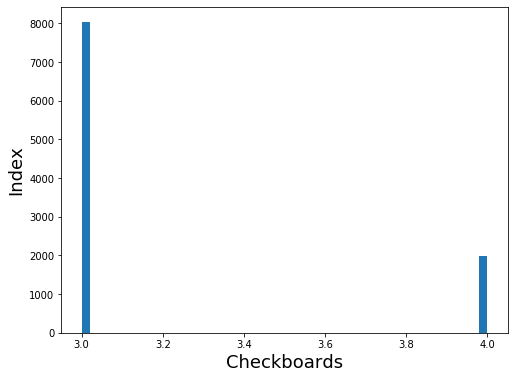

In [11]:
#ploting distribution of checkboards
fig = plt.figure(figsize=(8,6))
plt.hist(no_CUs, bins=50);
plt.xlabel("Checkboards",size=18)
plt.ylabel("Index",size=18);
